In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
import scipy
import sklearn.neighbors
import umap
import seaborn as sns
import hdbscan
from matplotlib import pyplot as plt
import os

In [5]:
max_var = 'max'

In [8]:
joined_path = os.path.join('/Users/jenniferthem/Masterthesis/core/data/UMAP_embedding', max_var, 'test')

In [9]:
joined_path

'/Users/jenniferthem/Masterthesis/core/data/UMAP_embedding/max/test'

In [ ]:
sav_path = '/Users/jenniferthem/Masterthesis/core/data'

In [10]:
name = 'sa'

In [12]:
name_umap = 'UMAP_' + name
print(name_umap)

UMAP_sa


In [40]:
    
colors6 = ['#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449']
colors7 = ['#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8']
colors8 = ['#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64']
colors9 = ['#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701']
colors10 = ['#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE']
colors11 = ['#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337']
colors12 = ['#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337']
colors13 = ['#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337', '#BD11A1']
colors14 = ['#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337', '#BD11A1', '#89AB94']
colors15 = ['#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337', '#BD11A1', '#89AB94','#ED1D0C']
colors16 = ['#808000', '#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337', '#BD11A1', '#89AB94','#ED1D0C']
colors17 = ['#7DDCAC', '#808000', '#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337', '#BD11A1', '#89AB94','#ED1D0C']
colors18 = ['#ED1D0C','#808000', '#FA8072', '#7DDCAC', '#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337', '#BD11A1', '#89AB94']

# 8 different color palettes with different amount of colors in it
colors = [colors6, colors7, colors8, colors9, colors10, colors11, colors12, colors13, colors14, colors15, colors16, colors17, colors18]
sns.set_palette(sns.color_palette(colors18))


In [42]:
# data, neighbors: how many next neighbors: int, name: how to call the resulting file: String, sav_path: output directory: string, roi_labels_df: DataFrame
def analysis_embedding_clustering(data, neighbors, metric, name, sav_path, cluster_selection_method, roi_labels_df):
    
    # UMAP embedding
    embedding = umap.UMAP(
        n_neighbors=neighbors,
        n_components=2,
        min_dist=0.0, # best for clustering
        metric=metric
    ).fit_transform(data)
    
    # save umap results as dataframe
    embedding_df = pd.DataFrame(embedding)
    # set name for saving
    name_umap = 'UMAP_' + name
    # save umap result
    np.save(os.path.join(sav_path, name_umap), embedding)

    # plot the embedding 
    %matplotlib notebook
    plt.scatter(embedding[:, 0], embedding[:, 1], s=0.1, cmap='Spectral');
    plt.title('UMAP Projection', fontsize=18);
    # save plot
    plt.savefig(os.path.join(sav_path, 'Plots', name_umap))
    
    
    # HDBScan
    labels = hdbscan.HDBSCAN(
        min_samples=5,
        min_cluster_size=200,
        cluster_selection_method=cluster_selection_method
    ).fit_predict(embedding)
    
    num_labels = np.amax(labels)+1
    
        
    clustered = (labels >= 0)
    
    labels_df = pd.DataFrame(labels)
    
    # concatenation of umap results and roi labels
    UMAP_roi_df = pd.concat([embedding_df, roi_labels_df], axis=1)
    # renaming
    UMAP_roi_df.columns = ['x', 'y', 'ROI']
    # saving dataframe
    name_sav_umap_roi = 'UMAP_ROI_' + name
    UMAP_roi_df.to_pickle(os.path.join(sav_path, name_sav_umap_roi))
    
    # concatenation of umap results and hdbscan labels
    UMAP_hdbscan_labels_df = pd.concat([embedding_df, labels_df], axis =1)
    # renaming 
    UMAP_hdbscan_labels_df.columns = ['x', 'y', 'class']
    # saving dataframe
    name_sav_umap_hdbscan = 'UMAP_HDBScan_' + name
    UMAP_roi_df.to_pickle(os.path.join(sav_path, name_sav_umap_hdbscan))
    
    # UMAP results with HDBScan label & ROI label
    UMAP_hdbscan_roi = pd.concat([UMAP_hdbscan_labels_df, roi_labels_df], axis=1)
    UMAP_hdbscan_roi.columns = ['x', 'y', 'HDBScanLabel', 'ROI']
    name_sav_all = 'UMAP_HDBScan_ROI_' + name
    UMAP_hdbscan_roi.to_pickle(os.path.join(sav_path, name_sav_all))
    
    percent_clustered = (np.sum(clustered) / embedding.shape[0])*100
    print(percent_clustered, '% of the data points were clustered')
    print('The HDBScan clustering yielded ', num_labels, ' classes')
    return num_labels, UMAP_hdbscan_labels_df, UMAP_roi_df, clustered


In [24]:
fc_matrix = np.load('/Users/jenniferthem/Masterthesis_Data/FC_matrix.npy')
roi_labels_df = pd.read_pickle('/Users/jenniferthem/Masterthesis_Data/roi_labels.pkl') # dataframe

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../anaconda3/envs/py37/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


<IPython.core.display.Javascript object>


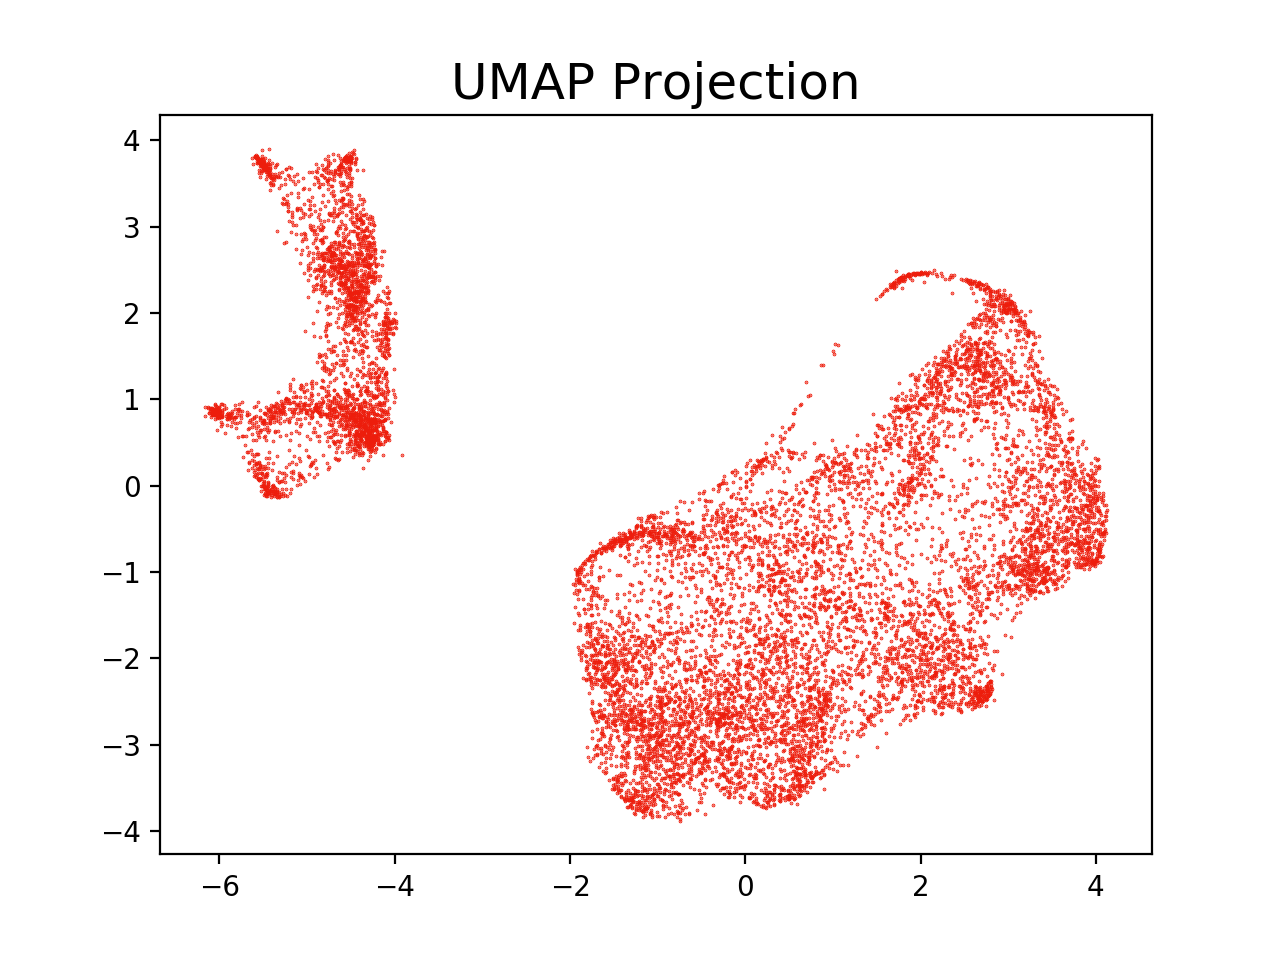

54.62581025338833 % of the data points were clustered


(13,               x         y  class
 0     -4.401782  0.736384      0
 1      0.888014 -2.407804      9
 2     -4.125334  0.933392      0
 3      1.098073 -2.353660     -1
 4     -4.735237  0.570804      0
 ...         ...       ...    ...
 11874 -6.067899  0.879289     -1
 11875 -6.077878  0.859239     -1
 11876 -6.079983  0.859494     -1
 11877 -6.105996  0.899465     -1
 11878 -6.038242  0.874178     -1
 
 [11879 rows x 3 columns],               x         y      ROI
 0     -4.401782  0.736384     OFC1
 1      0.888014 -2.407804     OFC1
 2     -4.125334  0.933392     OFC1
 3      1.098073 -2.353660     OFC1
 4     -4.735237  0.570804     OFC1
 ...         ...       ...      ...
 11874 -6.067899  0.879289  Caudate
 11875 -6.077878  0.859239  Caudate
 11876 -6.079983  0.859494  Caudate
 11877 -6.105996  0.899465  Caudate
 11878 -6.038242  0.874178  Caudate
 
 [11879 rows x 3 columns], array([ True,  True,  True, ..., False, False, False]))

In [43]:
analysis_embedding_clustering(fc_matrix, 50, 'euclidean', 'Euclidean', '/Users/jenniferthem/Masterthesis_Data', 'leaf', roi_labels_df)

## Plots

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../anaconda3/envs/py37/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


<IPython.core.display.Javascript object>


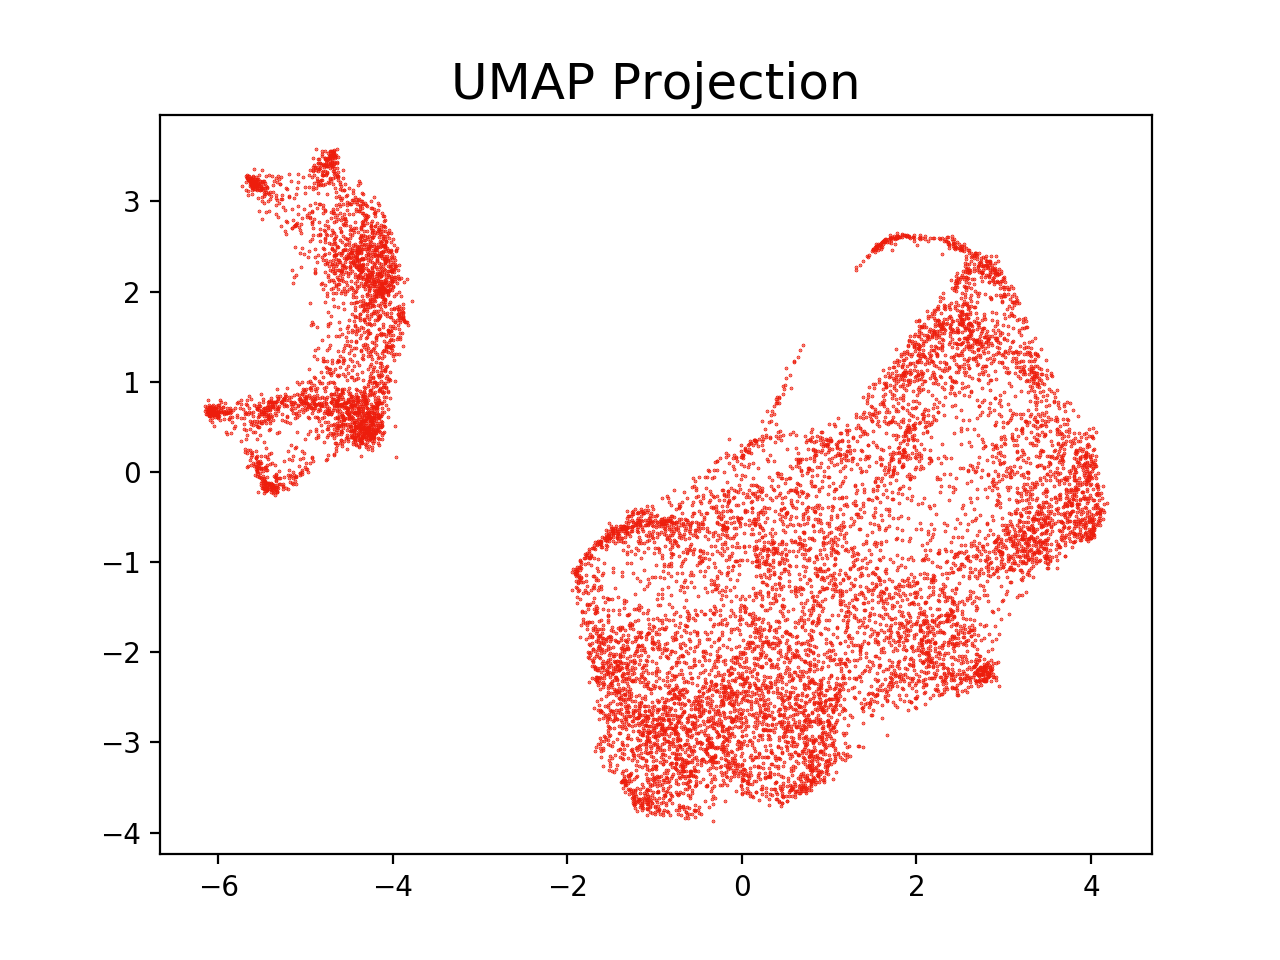

51.27535987877767 % of the data points were clustered


In [44]:
[n_labels, UMAP_hdbscan_labels_df, UMAP_roi_df, clustered] = analysis_embedding_clustering(fc_matrix, 50, 'euclidean', 'Euclidean', '/Users/jenniferthem/Masterthesis_Data', 'leaf', roi_labels_df)

In [46]:
n_labels

13

#### HDBScan Plot

In [50]:
# data has to have form of x, y, class DataFrame, clustered: np array
def plotting_hdbscan(UMAP_hdbscan_labels_df, UMAP_roi_df, clustered, color_palette, sav_path, name):
    
    %matplotlib notebook
    plot = sns.scatterplot(x="x", y="y", hue='class', data=UMAP_hdbscan_labels_df[clustered], palette = color_palette, legend = 'full', s=10)
    plt.legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)
    hdbscan_plot = 'hdbscan_plot_' +  name
    plt.savefig(os.path.join(sav_path, 'Plots', hdbscan_plot))
    

<IPython.core.display.Javascript object>


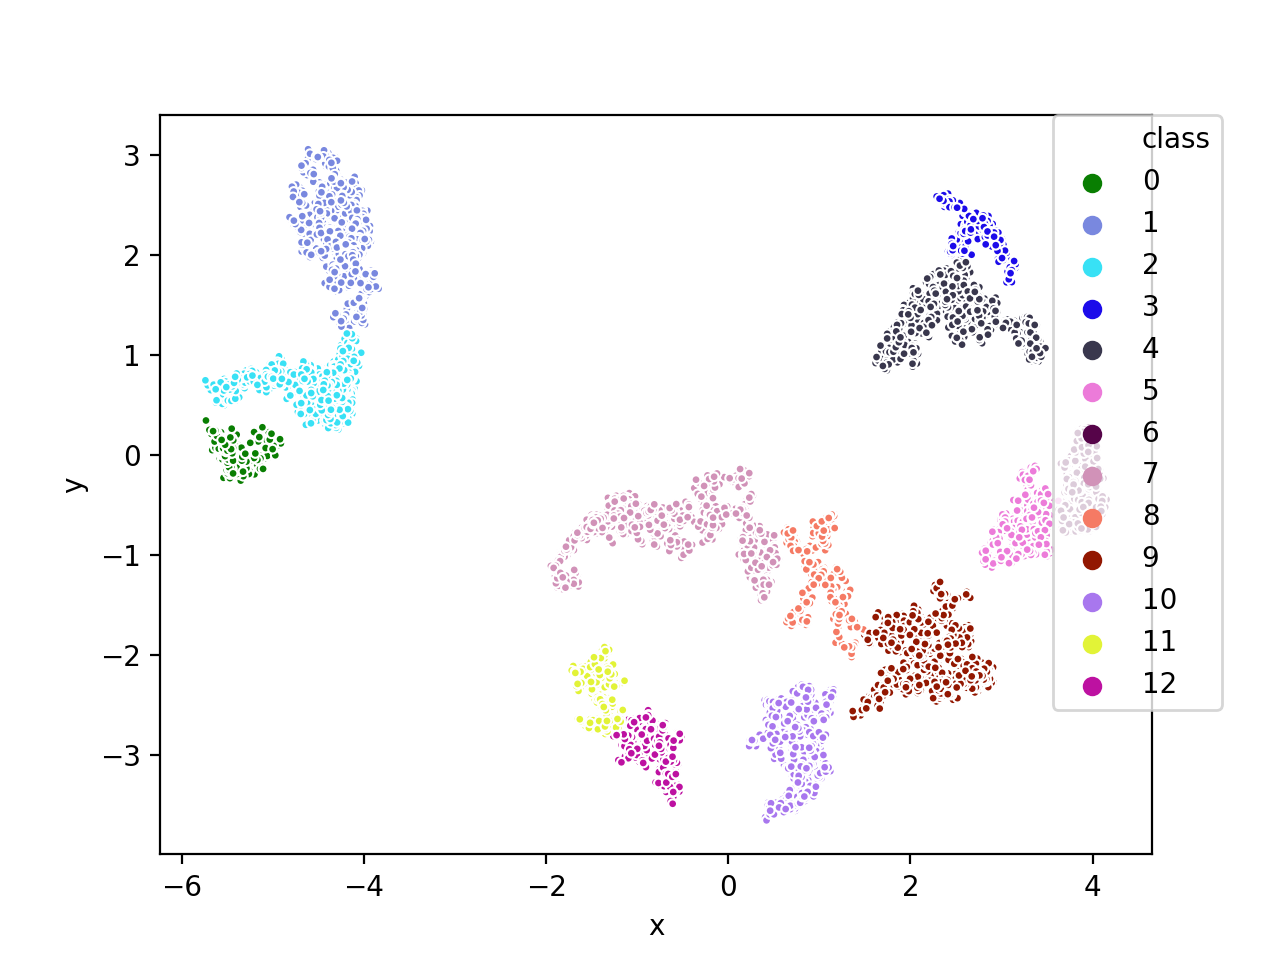

In [52]:
plotting_hdbscan(UMAP_hdbscan_labels_df, UMAP_roi_df, clustered, colors13, '/Users/jenniferthem/Masterthesis_Data', 'Euclidean')

In [54]:
def plotting_rois(UMAP_hdbscan_labels_df, UMAP_roi_df, clustered, color_palette, sav_path, name):
    
    
    %matplotlib notebook
    sp = sns.scatterplot(x="x", y="y", hue='ROI', data=UMAP_roi_df[clustered], palette = colors18, legend = 'full', s=10)
    plt.legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)
    roi_plot = 'hdbscan_roi_plot_' +  name
    plt.savefig(os.path.join(sav_path, 'Plots', roi_plot))

<IPython.core.display.Javascript object>


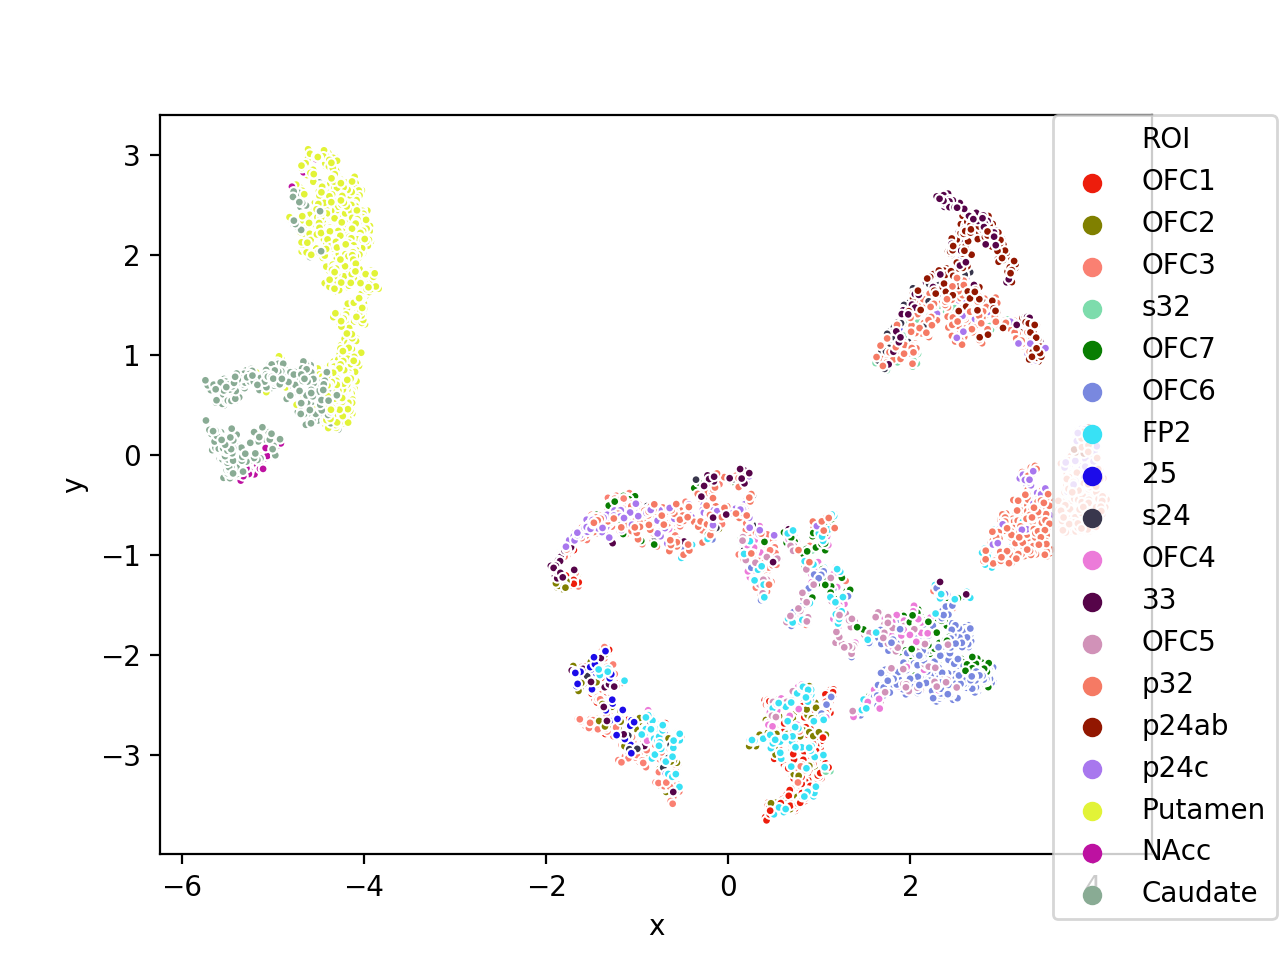

In [55]:
plotting_rois(UMAP_hdbscan_labels_df, UMAP_roi_df, clustered, colors13, '/Users/jenniferthem/Masterthesis_Data', 'Euclidean')